# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

crypto_data = {
    
    "Hodlings": [1.2, 5.3]
}

# Set crypto tickers

crypto_tickers = ["BTC", "ETH"]

#display sample data
df_Hodlings = pd.DataFrame(crypto_data, index=crypto_tickers)

# Display holdings
df_Hodlings

,Hodlings
BTC,1.2
ETH,5.3


In [4]:
# Crypto API URLs

import requests

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
my_btc_value = requests.get(btc_url).json()

# Fetch current ETH price
my_eth_value = requests.get(eth_url).json()

In [6]:
# Parse API JSON request and store in designated values:

print(json.dumps(my_btc_value, indent=4))

print(json.dumps(my_eth_value, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18740675,
            "total_supply": 18740675,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 32697.0,
                    "volume_24h": 60467228747,
                    "market_cap": 613289058596,
                    "percentage_change_1h": 1.18304624999285,
                    "percentage_change_24h": 1.01420582520372,
                    "percentage_change_7d": -19.5132853013394,
                    "percent_change_1h": 1.18304624999285,
                    "percent_change_24h": 1.01420582520372,
                    "percent_change_7d": -19.5132853013394
                },
                "CAD": {
                    "price": 40321.9404,
                    "volume_24h": 74568186490.8004,
                    "ma

In [7]:
# Parse the data for BTC and ETH

btc_price = my_btc_value["data"]["1"]["quotes"]["USD"]["price"]

eth_price = my_eth_value["data"]["1027"]["quotes"]["USD"]["price"]

In [8]:
# Compute current value of my crypto
my_btc_value = my_btc * btc_price

my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39236.40
The current value of your 5.3 ETH is $10141.71


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares

my_agg = 200
my_spy = 50

shares_data = {
    
    "Shares": [200, 50]
}

#set the tickers
tickers = ["AGG", "SPY"]

# Display sample data
df_Shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_Shares

,Shares
AGG,200
SPY,50


In [10]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
alpaca

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
today

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open    high     low    close   volume   open   
time                                                                         
2020-07-14 00:00:00-04:00  118.58  118.74  118.58  118.655  3611959  313.3   

                                                          
                             high  low   close    volume  
time                                                      
2020-07-14 00:00:00-04:00  319.76  312  318.89  79292036

In [12]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()

# fetch closing prices
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

,AGG,SPY
2020-07-14,118.655,318.89


In [13]:
# Compute the current value of shares

agg_close_price = df_closing_prices["AGG"][0]
spy_close_price = df_closing_prices["SPY"][0]

my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print the current value of shares

print(f"The current value of your {my_agg} AGG shares is: ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy}: SPY shares is: ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is: $23731.00
The current value of your 50: SPY shares is: $15944.50


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# add crypto and share values together:

crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

# Create savings DataFrame
data = {"Amount":[crypto, shares]}

# Create the pandas DataFrame
df_savings = pd.DataFrame(data, index = ['Crypto', 'Shares'])

# print dataframe.
print(df_savings)

           Amount
Crypto  49378.109
Shares  39675.500


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

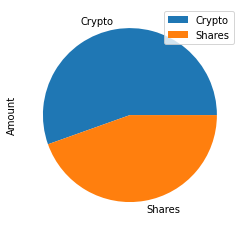

In [15]:
# Plot savings pie chart
df_savings.plot.pie(subplots = True)

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

total_savings

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
else:
    print(f"Consider making a plan to save funds for an emergency.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Preview DataFrame
df_portfolio

# Display sample data
df_portfolio.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [20]:
# Printing the simulation input data
MC_thirty_year = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [22]:
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992890,1.004631,1.000329,1.006281,0.997813,1.001848,1.005838,1.006802,0.989360,1.005222,...,1.005388,1.002752,1.007529,1.004420,0.995470,0.992848,0.998467,0.995399,1.004112,0.998537
2,1.005130,1.004838,1.000686,1.003449,1.000485,1.002112,1.006876,1.007632,1.000340,1.011392,...,1.004732,1.001663,1.013362,1.005488,1.001940,1.002988,0.992321,0.992964,1.006311,0.998419
3,1.009789,1.009071,1.007412,0.998892,1.005728,1.001079,1.008975,1.011142,0.984972,1.010067,...,1.005384,1.004845,1.005223,1.006264,0.991204,1.003761,1.002199,0.994299,1.005013,1.003620
4,1.015059,1.011955,1.016050,1.008692,1.004178,1.002450,1.011023,1.015207,0.970536,1.013320,...,1.008937,1.009022,1.012215,1.007955,0.998144,0.994194,1.004210,0.999206,1.004230,1.009901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.094591,13.497587,5.412921,3.381542,4.596596,2.263102,2.732196,10.949584,6.327886,7.048859,...,4.943436,2.441812,3.727310,5.604755,8.016522,6.064952,6.353046,5.254151,4.062199,6.716970
7557,6.136755,13.394512,5.441868,3.364492,4.583928,2.286704,2.736227,10.997523,6.355406,7.025296,...,4.929961,2.438707,3.714580,5.606039,8.028070,6.108912,6.320258,5.264236,4.049391,6.753661
7558,6.115921,13.392805,5.470259,3.389845,4.568643,2.283985,2.715534,11.026531,6.323622,7.063981,...,4.916345,2.430422,3.711096,5.643311,7.990201,6.120441,6.314170,5.235904,4.085151,6.821957
7559,6.099740,13.245082,5.477412,3.390864,4.579798,2.295080,2.693632,10.926223,6.367254,7.008497,...,4.918987,2.443369,3.720764,5.696851,7.982324,6.151095,6.305421,5.205174,4.100021,6.857358


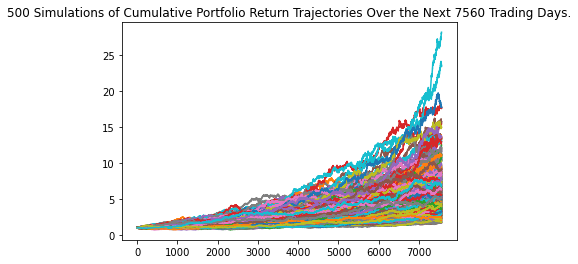

In [23]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirty_year_sim_plot.png", bbox_inches="tight")

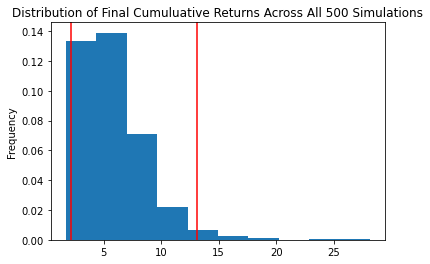

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirty_year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.900257
std               3.016586
min               1.704688
25%               3.755731
50%               5.278039
75%               7.228905
max              28.178761
95% CI Lower      2.199365
95% CI Upper     13.114315
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43987.29 and $262286.29


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $65980.94 and $393429.44


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_five_year = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [35]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

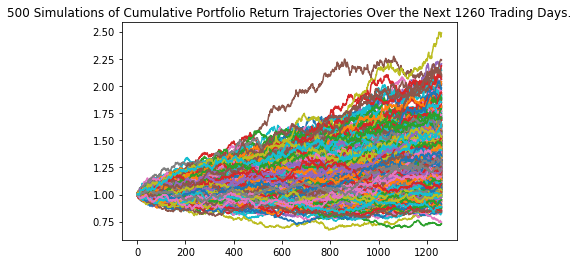

In [36]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_five_year_sim_plot.png", bbox_inches="tight")

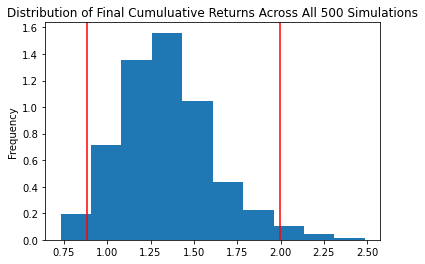

In [37]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_five_year_dist_plot.png',bbox_inches='tight')

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.345009
std               0.270560
min               0.730680
25%               1.158608
50%               1.316838
75%               1.498113
max               2.486871
95% CI Lower      0.885571
95% CI Upper      1.995422
Name: 1260, dtype: float64


In [41]:
# Set initial investment
initial_investment = 12000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $120,000
ci_lower_five = round(tbl[8]*12000,2)
ci_upper_five = round(tbl[9]*12000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $12000 in the portfolio over the next 5 years will end within in the range of $10626.85 and $23945.07


### Ten Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [43]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [ ]:
# Run simulation

MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


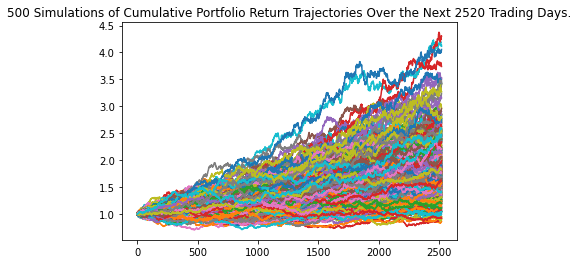

In [44]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_ten_year_sim_plot.png", bbox_inches="tight")

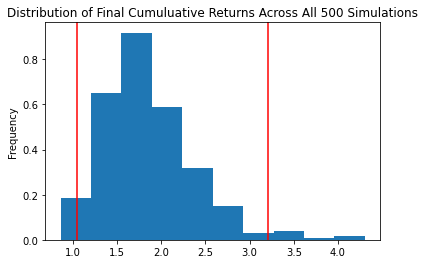

In [45]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_ten_year_dist_plot.png',bbox_inches='tight')

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.859376
std               0.523875
min               0.860694
25%               1.516170
50%               1.780608
75%               2.112314
max               4.303416
95% CI Lower      1.045259
95% CI Upper      3.201987
Name: 2520, dtype: float64


In [47]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62715.52 and $192119.2
